In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team      summoner region champion  timestamp  \
0       EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   0.000000   
1       EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   1.000300   
2       EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   2.000733   
3       EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   1.932467   
4       EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   3.001000   
...                 ...   ...           ...    ...      ...        ...   
392066   NA1_4573614609   Red  anonymous 97    na1    Kaisa  23.473867   
392067   NA1_4573614609   Red  anonymous 97    na1    Kaisa  23.488683   
392068   NA1_4573614609   Red  anonymous 97    na1    Kaisa  23.491417   
392069   NA1_4573614609   Red  anonymous 97    na1    Kaisa  26.337567   
392070   NA1_4573614609   Red  anonymous 97    na1    Kaisa  27.677733   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              554.0         581.0    1.0            0.0  ...   
1             3177.0        8848.0    1.0            0.0  ...   
2             2665.0       13301.0    1.0            2.0  ...   
3                NaN           NaN    NaN            NaN  ...   
4             3352.0       13461.0    3.0           14.0  ...   
...              ...           ...    ...            ...  ...   
392066           NaN           NaN    NaN            NaN  ...   
392067           NaN           NaN    NaN            NaN  ...   
392068           NaN           NaN    NaN            NaN  ...   
392069           NaN           NaN    NaN            NaN  ...   
392070           NaN           NaN    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory       eventType  \
0                             0.0              0.0    False             NaN   
1                             0.0              0.0    False             NaN   
2                             0.0              0.0    False             NaN   
3                             NaN              NaN    False    SkillLevelUp   
4                             0.0              0.0    False             NaN   
...                           ...              ...      ...             ...   
392066                        NaN              NaN    False  Item purchased   
392067                        NaN              NaN    False  Item purchased   
392068                        NaN              NaN    False  Item purchased   
392069                        NaN              NaN    False  Item purchased   
392070                        NaN              NaN    False  Item purchased   

        skillSlot  buildingType  lane  monster                   itemName  \
0             NaN           NaN   NaN      NaN                        NaN   
1             NaN           NaN   NaN      NaN                        NaN   
2             NaN           NaN   NaN      NaN                        NaN   
3             1.0           NaN   NaN      NaN                        NaN   
4             NaN           NaN   NaN      NaN                        NaN   
...           ...           ...   ...      ...                        ...   
392066        NaN           NaN   NaN      NaN  Locket of the Iron Solari   
392067        NaN           NaN   NaN      NaN               Control Ward   
392068        NaN           NaN   NaN      NaN               Control Ward   
392069        NaN           NaN   NaN      NaN          Null-Magic Mantle   
392070        NaN           NaN   NaN      NaN             Negatron Cloak   

          role  
0          TOP  
1          TOP  
2          TOP  
3          TOP  
4          TOP  
...        ...  
392066  BOTTOM  
392067  BOTTOM  
392068  BOTTOM  
392069  BOTTOM  
392070  BOTTOM  

[392071 rows x 55 columns]

In [3]:
top_deaths_df = df[(df["role"] == "TOP") & (df["eventType"] == "Death")]
top_deaths_df

gameId  team      summoner region champion  timestamp  \
17      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   8.117383   
21      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  10.668300   
39      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  18.028250   
43      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  20.528133   
47      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  22.148033   
...                 ...   ...           ...    ...      ...        ...   
273631    KR_6375996445   Red  anonymous 21     kr     Sion  16.009683   
273636    KR_6375996445   Red  anonymous 21     kr     Sion  18.526400   
273645    KR_6375996445   Red  anonymous 21     kr     Sion  21.620800   
273657    KR_6375996445   Red  anonymous 21     kr     Sion  25.485417   
273671    KR_6375996445   Red  anonymous 21     kr     Sion  32.699167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17            1056.0       11970.0    NaN            NaN  ...   
21            2696.0       12894.0    NaN            NaN  ...   
39            4790.0       13525.0    NaN            NaN  ...   
43            7771.0        5755.0    NaN            NaN  ...   
47            5003.0        5355.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273631        1771.0       11742.0    NaN            NaN  ...   
273636        8611.0        5140.0    NaN            NaN  ...   
273645        5283.0        9605.0    NaN            NaN  ...   
273657        4439.0        5171.0    NaN            NaN  ...   
273671       11064.0       13195.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
17                            NaN              NaN    False      Death   
21                            NaN              NaN    False      Death   
39                            NaN              NaN    False      Death   
43                            NaN              NaN    False      Death   
47                            NaN              NaN    False      Death   
...                           ...              ...      ...        ...   
273631                        NaN              NaN     True      Death   
273636                        NaN              NaN     True      Death   
273645                        NaN              NaN     True      Death   
273657                        NaN              NaN     True      Death   
273671                        NaN              NaN     True      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
17            NaN           NaN   NaN      NaN       NaN   TOP  
21            NaN           NaN   NaN      NaN       NaN   TOP  
39            NaN           NaN   NaN      NaN       NaN   TOP  
43            NaN           NaN   NaN      NaN       NaN   TOP  
47            NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273631        NaN           NaN   NaN      NaN       NaN   TOP  
273636        NaN           NaN   NaN      NaN       NaN   TOP  
273645        NaN           NaN   NaN      NaN       NaN   TOP  
273657        NaN           NaN   NaN      NaN       NaN   TOP  
273671        NaN           NaN   NaN      NaN       NaN   TOP  

[4573 rows x 55 columns]

Champions' winrates

In [4]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

win rate  matches
champion                    
Jayce          0.53    115.0
Jax            0.50    112.0
LeeSin         0.56     82.0
Gnar           0.58     38.0
Gragas         0.45     38.0
...             ...      ...
Lillia         0.00      1.0
Viego          0.00      1.0
Vi             0.00      1.0
TahmKench      0.00      1.0
Chogath        0.00      1.0

[64 rows x 2 columns]

In [8]:
print("This dataset contains {} matches in which the top died at least once".format(len(np.unique(top_deaths_df["gameId"]))))

This dataset contains 802 matches in which the top died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(top_deaths_df["summoner"])), top_deaths_df.shape[0]))

17 players died a total of 4573 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((top_deaths_df.shape[0]/len(np.unique(top_deaths_df["gameId"])))))

This Dataset contains an average of 5.701995012468828 deaths per game


In [11]:
blueSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
blueSide_top_deaths_df

gameId  team      summoner region champion  timestamp  \
17      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   8.117383   
21      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  10.668300   
39      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  18.028250   
43      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  20.528133   
47      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  22.148033   
...                 ...   ...           ...    ...      ...        ...   
273534    KR_6376015376  Blue  anonymous 20     kr     Sion  21.960717   
273539    KR_6376015376  Blue  anonymous 20     kr     Sion  24.205267   
273543    KR_6376015376  Blue  anonymous 20     kr     Sion  25.579383   
273547    KR_6376015376  Blue  anonymous 20     kr     Sion  28.063350   
273552    KR_6376015376  Blue  anonymous 20     kr     Sion  29.788467   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17            1056.0       11970.0    NaN            NaN  ...   
21            2696.0       12894.0    NaN            NaN  ...   
39            4790.0       13525.0    NaN            NaN  ...   
43            7771.0        5755.0    NaN            NaN  ...   
47            5003.0        5355.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273534        7793.0        1257.0    NaN            NaN  ...   
273539        1222.0        9164.0    NaN            NaN  ...   
273543        5441.0        3406.0    NaN            NaN  ...   
273547        2928.0        2319.0    NaN            NaN  ...   
273552        7406.0        2504.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
17                            NaN              NaN    False      Death   
21                            NaN              NaN    False      Death   
39                            NaN              NaN    False      Death   
43                            NaN              NaN    False      Death   
47                            NaN              NaN    False      Death   
...                           ...              ...      ...        ...   
273534                        NaN              NaN    False      Death   
273539                        NaN              NaN    False      Death   
273543                        NaN              NaN    False      Death   
273547                        NaN              NaN    False      Death   
273552                        NaN              NaN    False      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
17            NaN           NaN   NaN      NaN       NaN   TOP  
21            NaN           NaN   NaN      NaN       NaN   TOP  
39            NaN           NaN   NaN      NaN       NaN   TOP  
43            NaN           NaN   NaN      NaN       NaN   TOP  
47            NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273534        NaN           NaN   NaN      NaN       NaN   TOP  
273539        NaN           NaN   NaN      NaN       NaN   TOP  
273543        NaN           NaN   NaN      NaN       NaN   TOP  
273547        NaN           NaN   NaN      NaN       NaN   TOP  
273552        NaN           NaN   NaN      NaN       NaN   TOP  

[2148 rows x 55 columns]

In [12]:
gamesBlueSide = len(np.unique(blueSide_top_deaths_df["gameId"]))
gamesBlueSide

366

In [13]:
players_df = np.unique(blueSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_top_deaths_df[blueSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 10 played 14 matches
anonymous 11 played 16 matches
anonymous 13 played 7 matches
anonymous 14 played 9 matches
anonymous 15 played 33 matches
anonymous 16 played 30 matches
anonymous 17 played 25 matches
anonymous 18 played 4 matches
anonymous 19 played 30 matches
anonymous 2 played 33 matches
anonymous 20 played 24 matches
anonymous 21 played 20 matches
anonymous 3 played 16 matches
anonymous 4 played 33 matches
anonymous 5 played 34 matches
anonymous 7 played 28 matches
anonymous 9 played 10 matches


In [14]:
print("Blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSide_top_deaths_df["gameId"]))))

Blue side contains 366 matches in which the top died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_top_deaths_df["summoner"])), blueSide_top_deaths_df.shape[0]))

17 players died a total of 2148 times on the blue side


In [16]:
redSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Red"]
redSide_top_deaths_df

gameId team      summoner region  champion  timestamp  \
78      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  12.202533   
92      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  18.802083   
95      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  20.203050   
102     EUW1_6272332377  Red   anonymous 2   euw1  Tristana  23.640633   
107     EUW1_6272332377  Red   anonymous 2   euw1  Tristana  25.149617   
...                 ...  ...           ...    ...       ...        ...   
273631    KR_6375996445  Red  anonymous 21     kr      Sion  16.009683   
273636    KR_6375996445  Red  anonymous 21     kr      Sion  18.526400   
273645    KR_6375996445  Red  anonymous 21     kr      Sion  21.620800   
273657    KR_6375996445  Red  anonymous 21     kr      Sion  25.485417   
273671    KR_6375996445  Red  anonymous 21     kr      Sion  32.699167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
78            1254.0       12224.0    NaN            NaN  ...   
92           10015.0        2461.0    NaN            NaN  ...   
95           13421.0        3623.0    NaN            NaN  ...   
102           9809.0        6153.0    NaN            NaN  ...   
107           7536.0        7962.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273631        1771.0       11742.0    NaN            NaN  ...   
273636        8611.0        5140.0    NaN            NaN  ...   
273645        5283.0        9605.0    NaN            NaN  ...   
273657        4439.0        5171.0    NaN            NaN  ...   
273671       11064.0       13195.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
78                            NaN              NaN    False      Death   
92                            NaN              NaN    False      Death   
95                            NaN              NaN    False      Death   
102                           NaN              NaN    False      Death   
107                           NaN              NaN    False      Death   
...                           ...              ...      ...        ...   
273631                        NaN              NaN     True      Death   
273636                        NaN              NaN     True      Death   
273645                        NaN              NaN     True      Death   
273657                        NaN              NaN     True      Death   
273671                        NaN              NaN     True      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
78            NaN           NaN   NaN      NaN       NaN   TOP  
92            NaN           NaN   NaN      NaN       NaN   TOP  
95            NaN           NaN   NaN      NaN       NaN   TOP  
102           NaN           NaN   NaN      NaN       NaN   TOP  
107           NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273631        NaN           NaN   NaN      NaN       NaN   TOP  
273636        NaN           NaN   NaN      NaN       NaN   TOP  
273645        NaN           NaN   NaN      NaN       NaN   TOP  
273657        NaN           NaN   NaN      NaN       NaN   TOP  
273671        NaN           NaN   NaN      NaN       NaN   TOP  

[2425 rows x 55 columns]

In [17]:
gamesRedSide = len(np.unique(redSide_top_deaths_df["gameId"]))
gamesRedSide

441

In [18]:
players_df = np.unique(redSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 10 played 24 matches
anonymous 11 played 23 matches
anonymous 13 played 9 matches
anonymous 14 played 16 matches
anonymous 15 played 36 matches
anonymous 16 played 41 matches
anonymous 17 played 31 matches
anonymous 18 played 12 matches
anonymous 19 played 45 matches
anonymous 2 played 24 matches
anonymous 20 played 28 matches
anonymous 21 played 17 matches
anonymous 3 played 20 matches
anonymous 4 played 40 matches
anonymous 5 played 37 matches
anonymous 7 played 24 matches
anonymous 9 played 14 matches


In [19]:
print("Red side contains {} matches in which the top died at least once".format(len(np.unique(redSide_top_deaths_df["gameId"]))))

Red side contains 441 matches in which the top died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_top_deaths_df["summoner"])), redSide_top_deaths_df.shape[0]))

17 players died a total of 2425 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region    champion  timestamp  \
481     EUW1_6272437680  Red   anonymous 3   euw1        Gwen   7.708883   
510     EUW1_6272437680  Red   anonymous 3   euw1        Gwen  20.053433   
513     EUW1_6272437680  Red   anonymous 3   euw1        Gwen  22.083250   
756     EUW1_6273629158  Red   anonymous 5   euw1  Cassiopeia   5.660117   
761     EUW1_6273629158  Red   anonymous 5   euw1  Cassiopeia   7.215383   
...                 ...  ...           ...    ...         ...        ...   
273631    KR_6375996445  Red  anonymous 21     kr        Sion  16.009683   
273636    KR_6375996445  Red  anonymous 21     kr        Sion  18.526400   
273645    KR_6375996445  Red  anonymous 21     kr        Sion  21.620800   
273657    KR_6375996445  Red  anonymous 21     kr        Sion  25.485417   
273671    KR_6375996445  Red  anonymous 21     kr        Sion  32.699167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
481           2235.0       12168.0    NaN            NaN  ...   
510           7579.0        4817.0    NaN            NaN  ...   
513            798.0        8552.0    NaN            NaN  ...   
756           1854.0       11744.0    NaN            NaN  ...   
761           1631.0       11934.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273631        1771.0       11742.0    NaN            NaN  ...   
273636        8611.0        5140.0    NaN            NaN  ...   
273645        5283.0        9605.0    NaN            NaN  ...   
273657        4439.0        5171.0    NaN            NaN  ...   
273671       11064.0       13195.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
481                           NaN              NaN     True      Death   
510                           NaN              NaN     True      Death   
513                           NaN              NaN     True      Death   
756                           NaN              NaN     True      Death   
761                           NaN              NaN     True      Death   
...                           ...              ...      ...        ...   
273631                        NaN              NaN     True      Death   
273636                        NaN              NaN     True      Death   
273645                        NaN              NaN     True      Death   
273657                        NaN              NaN     True      Death   
273671                        NaN              NaN     True      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
481           NaN           NaN   NaN      NaN       NaN   TOP  
510           NaN           NaN   NaN      NaN       NaN   TOP  
513           NaN           NaN   NaN      NaN       NaN   TOP  
756           NaN           NaN   NaN      NaN       NaN   TOP  
761           NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273631        NaN           NaN   NaN      NaN       NaN   TOP  
273636        NaN           NaN   NaN      NaN       NaN   TOP  
273645        NaN           NaN   NaN      NaN       NaN   TOP  
273657        NaN           NaN   NaN      NaN       NaN   TOP  
273671        NaN           NaN   NaN      NaN       NaN   TOP  

[1096 rows x 55 columns]

In [28]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

56.235827664399096

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

45.19587628865979

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 won 13 matches on the red side
anonymous 10 has an average of 4.615384615384615 deaths per game when winning on the red side

anonymous 11 won 15 matches on the red side
anonymous 11 has an average of 4.333333333333333 deaths per game when winning on the red side

anonymous 13 won 5 matches on the red side
anonymous 13 has an average of 2.8 deaths per game when winning on the red side

anonymous 14 won 11 matches on the red side
anonymous 14 has an average of 3.272727272727273 deaths per game when winning on the red side

anonymous 15 won 16 matches on the red side
anonymous 15 has an average of 2.875 deaths per game when winning on the red side

anonymous 16 won 21 matches on the red side
anonymous 16 has an average of 5.095238095238095 deaths per game when winning on the red side

anonymous 17 won 21 matches on the red side
anonymous 17 has an average of 3.857142857142857 deaths per game when winning on the red side

anonymous 18 won 6 matches on the red side
anonymous 1

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 248 matches in which the jungler died at least once
17 players died a total of 1096 times on the red side
Victory games on red side contains an average of 4.419354838709677 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
481           2235.0       12168.0   7.708883
510           7579.0        4817.0  20.053433
513            798.0        8552.0  22.083250
756           1854.0       11744.0   5.660117
761           1631.0       11934.0   7.215383
...              ...           ...        ...
273631        1771.0       11742.0  16.009683
273636        8611.0        5140.0  18.526400
273645        5283.0        9605.0  21.620800
273657        4439.0        5171.0  25.485417
273671       11064.0       13195.0  32.699167

[1096 rows x 3 columns]

Time discretization

In [35]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
481        -0.685493      0.709595         -1
510         1.044862     -1.080074          0
513        -1.150785     -0.170753          0
756        -0.808859      0.606369         -1
761        -0.881065      0.652626         -1
...              ...           ...        ...
273631     -0.835734      0.605882          0
273636      1.379018     -1.001436          0
273645      0.301431      0.085609          0
273657      0.028149     -0.993889          1
273671      2.173284      0.959628          1

[1096 rows x 3 columns]

[2 3 4 5 6 7 8 9]


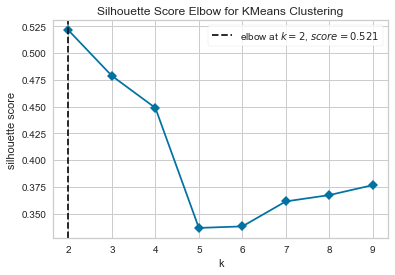

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
ks = np.arange(2,10, 1)
print(ks)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

In [170]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.5213595271287104
Silhouette score for k=3: 0.47869987321634433
Silhouette score for k=4: 0.45313727790721753
Silhouette score for k=5: 0.3363062346753048


Silhouette score for k=6: 0.33827448864314136
Silhouette score for k=7: 0.3605674176783526
Silhouette score for k=8: 0.3732949559673572
Silhouette score for k=9: 0.37642270309339837
Silhouette score for k=10: 0.38290118946407786
Silhouette score for k=11: 0.3839620428794427
Silhouette score for k=12: 0.39463928535683107
Silhouette score for k=13: 0.39100169468153
Silhouette score for k=14: 0.3948088475192552
Silhouette score for k=15: 0.36043709016774567
Silhouette score for k=16: 0.3702901217488922
Silhouette score for k=17: 0.3721504505413445
Silhouette score for k=18: 0.36858959760973997
Silhouette score for k=19: 0.3720107547968045
Silhouette score for k=20: 0.36740592565652935
Silhouette score for k=25: 0.39029822247249407


k = 4

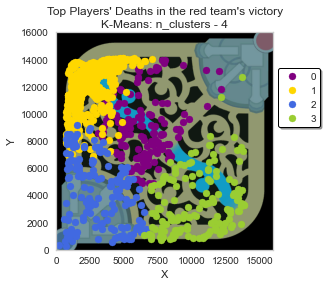

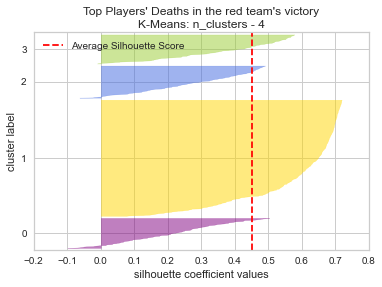

Silhouette score: 0.45313727790721753
1    613
2    170
0    159
3    154
Name: cluster, dtype: int64

Inertia: 727.5403891826277

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   6288.528302   8906.440252  -0.037736
1        1   2718.215334  12152.432300  -0.905383
2        2   3107.029412   4397.194118   0.252941
3        3  10230.694805   3432.454545   0.071429

In [171]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

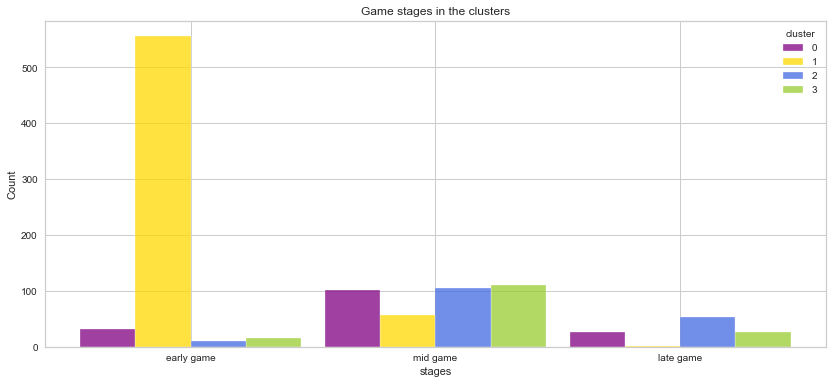

In [172]:
stagesPerClusterV2(redSideVictory_df, colors)

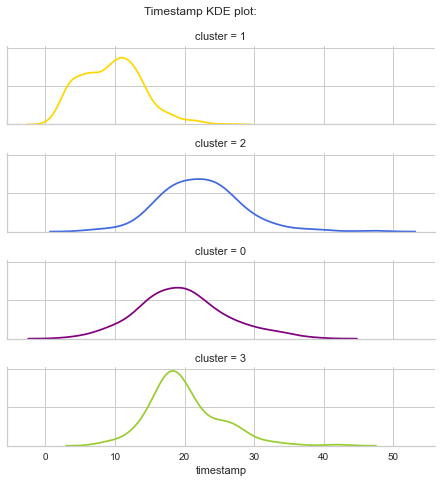

In [173]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

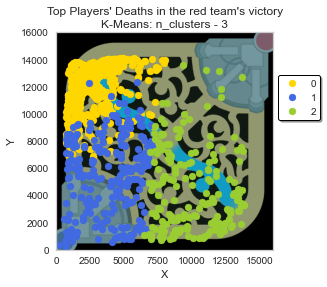

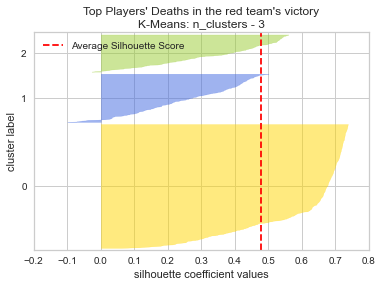

Silhouette score: 0.47869987321634433
0    648
1    253
2    195
Name: cluster, dtype: int64

Inertia: 862.2897974334187

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2896.558642  12110.408951  -0.878086
1        1   3848.699605   5595.316206   0.209486
2        2   9841.912821   4505.261538   0.046154

In [174]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [175]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1433.832453   1592.531368   0.336487
1        1   1916.284293   2800.821072   0.561960
2        2   2122.676616   3031.210898   0.548119

In [176]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8027.0             724.0           14108.0   
1        1            7165.0             236.0           12335.0   
2        2           13864.0            6508.0           13619.0   

   min coordinate_y  max timestamp  min timestamp  
0            6917.0              1             -1  
1             281.0              1             -1  
2             757.0              1             -1

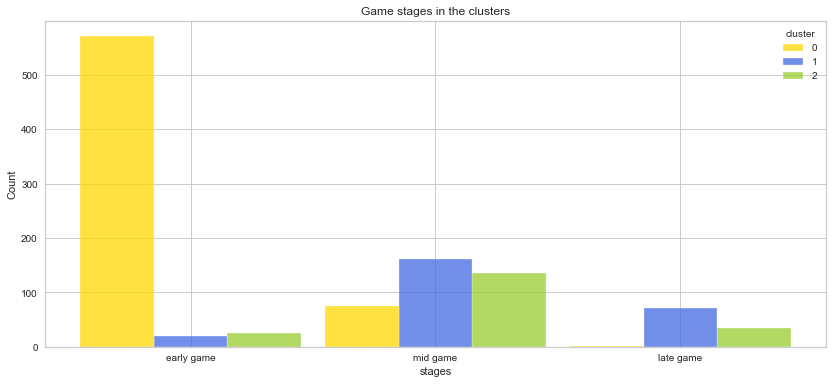

In [177]:
stagesPerClusterV2(redSideVictory_df, colors)

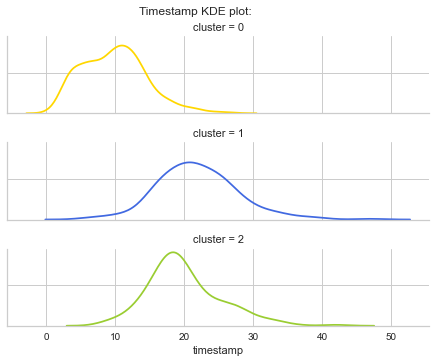

In [178]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [179]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jax              33
Jayce            29
LeeSin           28
Gnar             17
Gragas           13
Irelia           12
Sion             11
Gangplank        11
KSante           11
Renekton          8
Gwen              7
Kled              5
Darius            5
Fiora             5
Olaf              5
Cassiopeia        4
Kayle             4
Camille           4
Alistar           3
Garen             3
Malphite          3
Lucian            3
Kennen            2
Yone              2
Vayne             2
JarvanIV          2
Akshan            2
Leblanc           1
Quinn             1
Shen              1
Akali             1
Warwick           1
Graves            1
Pantheon          1
Vladimir          1
Shyvana           1
Sylas             1
Illaoi            1
Rumble            1
Udyr              1
Aatrox            1

Deaths with each champion:

In [180]:
print("Deaths with each champion:\n")
championsDeaths = profiling_df["champion"].value_counts()
championsDeaths

Deaths with each champion:



LeeSin        157
Jax           146
Jayce         118
Gnar           71
Irelia         62
Gangplank      53
Sion           41
Gragas         40
KSante         37
Renekton       35
Gwen           29
Darius         28
Kayle          23
Garen          20
Lucian         20
Olaf           19
Fiora          17
Cassiopeia     16
Malphite       15
Camille        14
Kled           14
Graves         11
Alistar        11
Akshan         10
Vayne          10
Yone            9
Udyr            8
Aatrox          7
Akali           7
Vladimir        6
Illaoi          6
Warwick         6
Quinn           5
Kennen          5
JarvanIV        4
Leblanc         4
Rumble          4
Shen            3
Sylas           2
Pantheon        2
Shyvana         1
Name: champion, dtype: int64

In [181]:
type(championsDeaths)
championsDeaths.to_frame()
championsDeaths = championsDeaths.reset_index()
championsDeaths = championsDeaths.rename(columns={"index": "champion", "champion": "deaths"})
championsDeaths

champion  deaths
0       LeeSin     157
1          Jax     146
2        Jayce     118
3         Gnar      71
4       Irelia      62
5    Gangplank      53
6         Sion      41
7       Gragas      40
8       KSante      37
9     Renekton      35
10        Gwen      29
11      Darius      28
12       Kayle      23
13       Garen      20
14      Lucian      20
15        Olaf      19
16       Fiora      17
17  Cassiopeia      16
18    Malphite      15
19     Camille      14
20        Kled      14
21      Graves      11
22     Alistar      11
23      Akshan      10
24       Vayne      10
25        Yone       9
26        Udyr       8
27      Aatrox       7
28       Akali       7
29    Vladimir       6
30      Illaoi       6
31     Warwick       6
32       Quinn       5
33      Kennen       5
34    JarvanIV       4
35     Leblanc       4
36      Rumble       4
37        Shen       3
38       Sylas       2
39    Pantheon       2
40     Shyvana       1

In [182]:
images = []
for i in championsDeaths.iterrows():
    images.append("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/images/" + str(i[1][0]) + "_0.jpg")

championsDeaths["images"] = images
championsDeaths

champion  deaths                                             images
0       LeeSin     157  /home/bambito9/Esports-Data-Analysis/API Reque...
1          Jax     146  /home/bambito9/Esports-Data-Analysis/API Reque...
2        Jayce     118  /home/bambito9/Esports-Data-Analysis/API Reque...
3         Gnar      71  /home/bambito9/Esports-Data-Analysis/API Reque...
4       Irelia      62  /home/bambito9/Esports-Data-Analysis/API Reque...
5    Gangplank      53  /home/bambito9/Esports-Data-Analysis/API Reque...
6         Sion      41  /home/bambito9/Esports-Data-Analysis/API Reque...
7       Gragas      40  /home/bambito9/Esports-Data-Analysis/API Reque...
8       KSante      37  /home/bambito9/Esports-Data-Analysis/API Reque...
9     Renekton      35  /home/bambito9/Esports-Data-Analysis/API Reque...
10        Gwen      29  /home/bambito9/Esports-Data-Analysis/API Reque...
11      Darius      28  /home/bambito9/Esports-Data-Analysis/API Reque...
12       Kayle      23  /home/bambito9/Esports-Data-Analysis/API Reque...
13       Garen      20  /home/bambito9/Esports-Data-Analysis/API Reque...
14      Lucian      20  /home/bambito9/Esports-Data-Analysis/API Reque...
15        Olaf      19  /home/bambito9/Esports-Data-Analysis/API Reque...
16       Fiora      17  /home/bambito9/Esports-Data-Analysis/API Reque...
17  Cassiopeia      16  /home/bambito9/Esports-Data-Analysis/API Reque...
18    Malphite      15  /home/bambito9/Esports-Data-Analysis/API Reque...
19     Camille      14  /home/bambito9/Esports-Data-Analysis/API Reque...
20        Kled      14  /home/bambito9/Esports-Data-Analysis/API Reque...
21      Graves      11  /home/bambito9/Esports-Data-Analysis/API Reque...
22     Alistar      11  /home/bambito9/Esports-Data-Analysis/API Reque...
23      Akshan      10  /home/bambito9/Esports-Data-Analysis/API Reque...
24       Vayne      10  /home/bambito9/Esports-Data-Analysis/API Reque...
25        Yone       9  /home/bambito9/Esports-Data-Analysis/API Reque...
26        Udyr       8  /home/bambito9/Esports-Data-Analysis/API Reque...
27      Aatrox       7  /home/bambito9/Esports-Data-Analysis/API Reque...
28       Akali       7  /home/bambito9/Esports-Data-Analysis/API Reque...
29    Vladimir       6  /home/bambito9/Esports-Data-Analysis/API Reque...
30      Illaoi       6  /home/bambito9/Esports-Data-Analysis/API Reque...
31     Warwick       6  /home/bambito9/Esports-Data-Analysis/API Reque...
32       Quinn       5  /home/bambito9/Esports-Data-Analysis/API Reque...
33      Kennen       5  /home/bambito9/Esports-Data-Analysis/API Reque...
34    JarvanIV       4  /home/bambito9/Esports-Data-Analysis/API Reque...
35     Leblanc       4  /home/bambito9/Esports-Data-Analysis/API Reque...
36      Rumble       4  /home/bambito9/Esports-Data-Analysis/API Reque...
37        Shen       3  /home/bambito9/Esports-Data-Analysis/API Reque...
38       Sylas       2  /home/bambito9/Esports-Data-Analysis/API Reque...
39    Pantheon       2  /home/bambito9/Esports-Data-Analysis/API Reque...
40     Shyvana       1  /home/bambito9/Esports-Data-Analysis/API Reque...

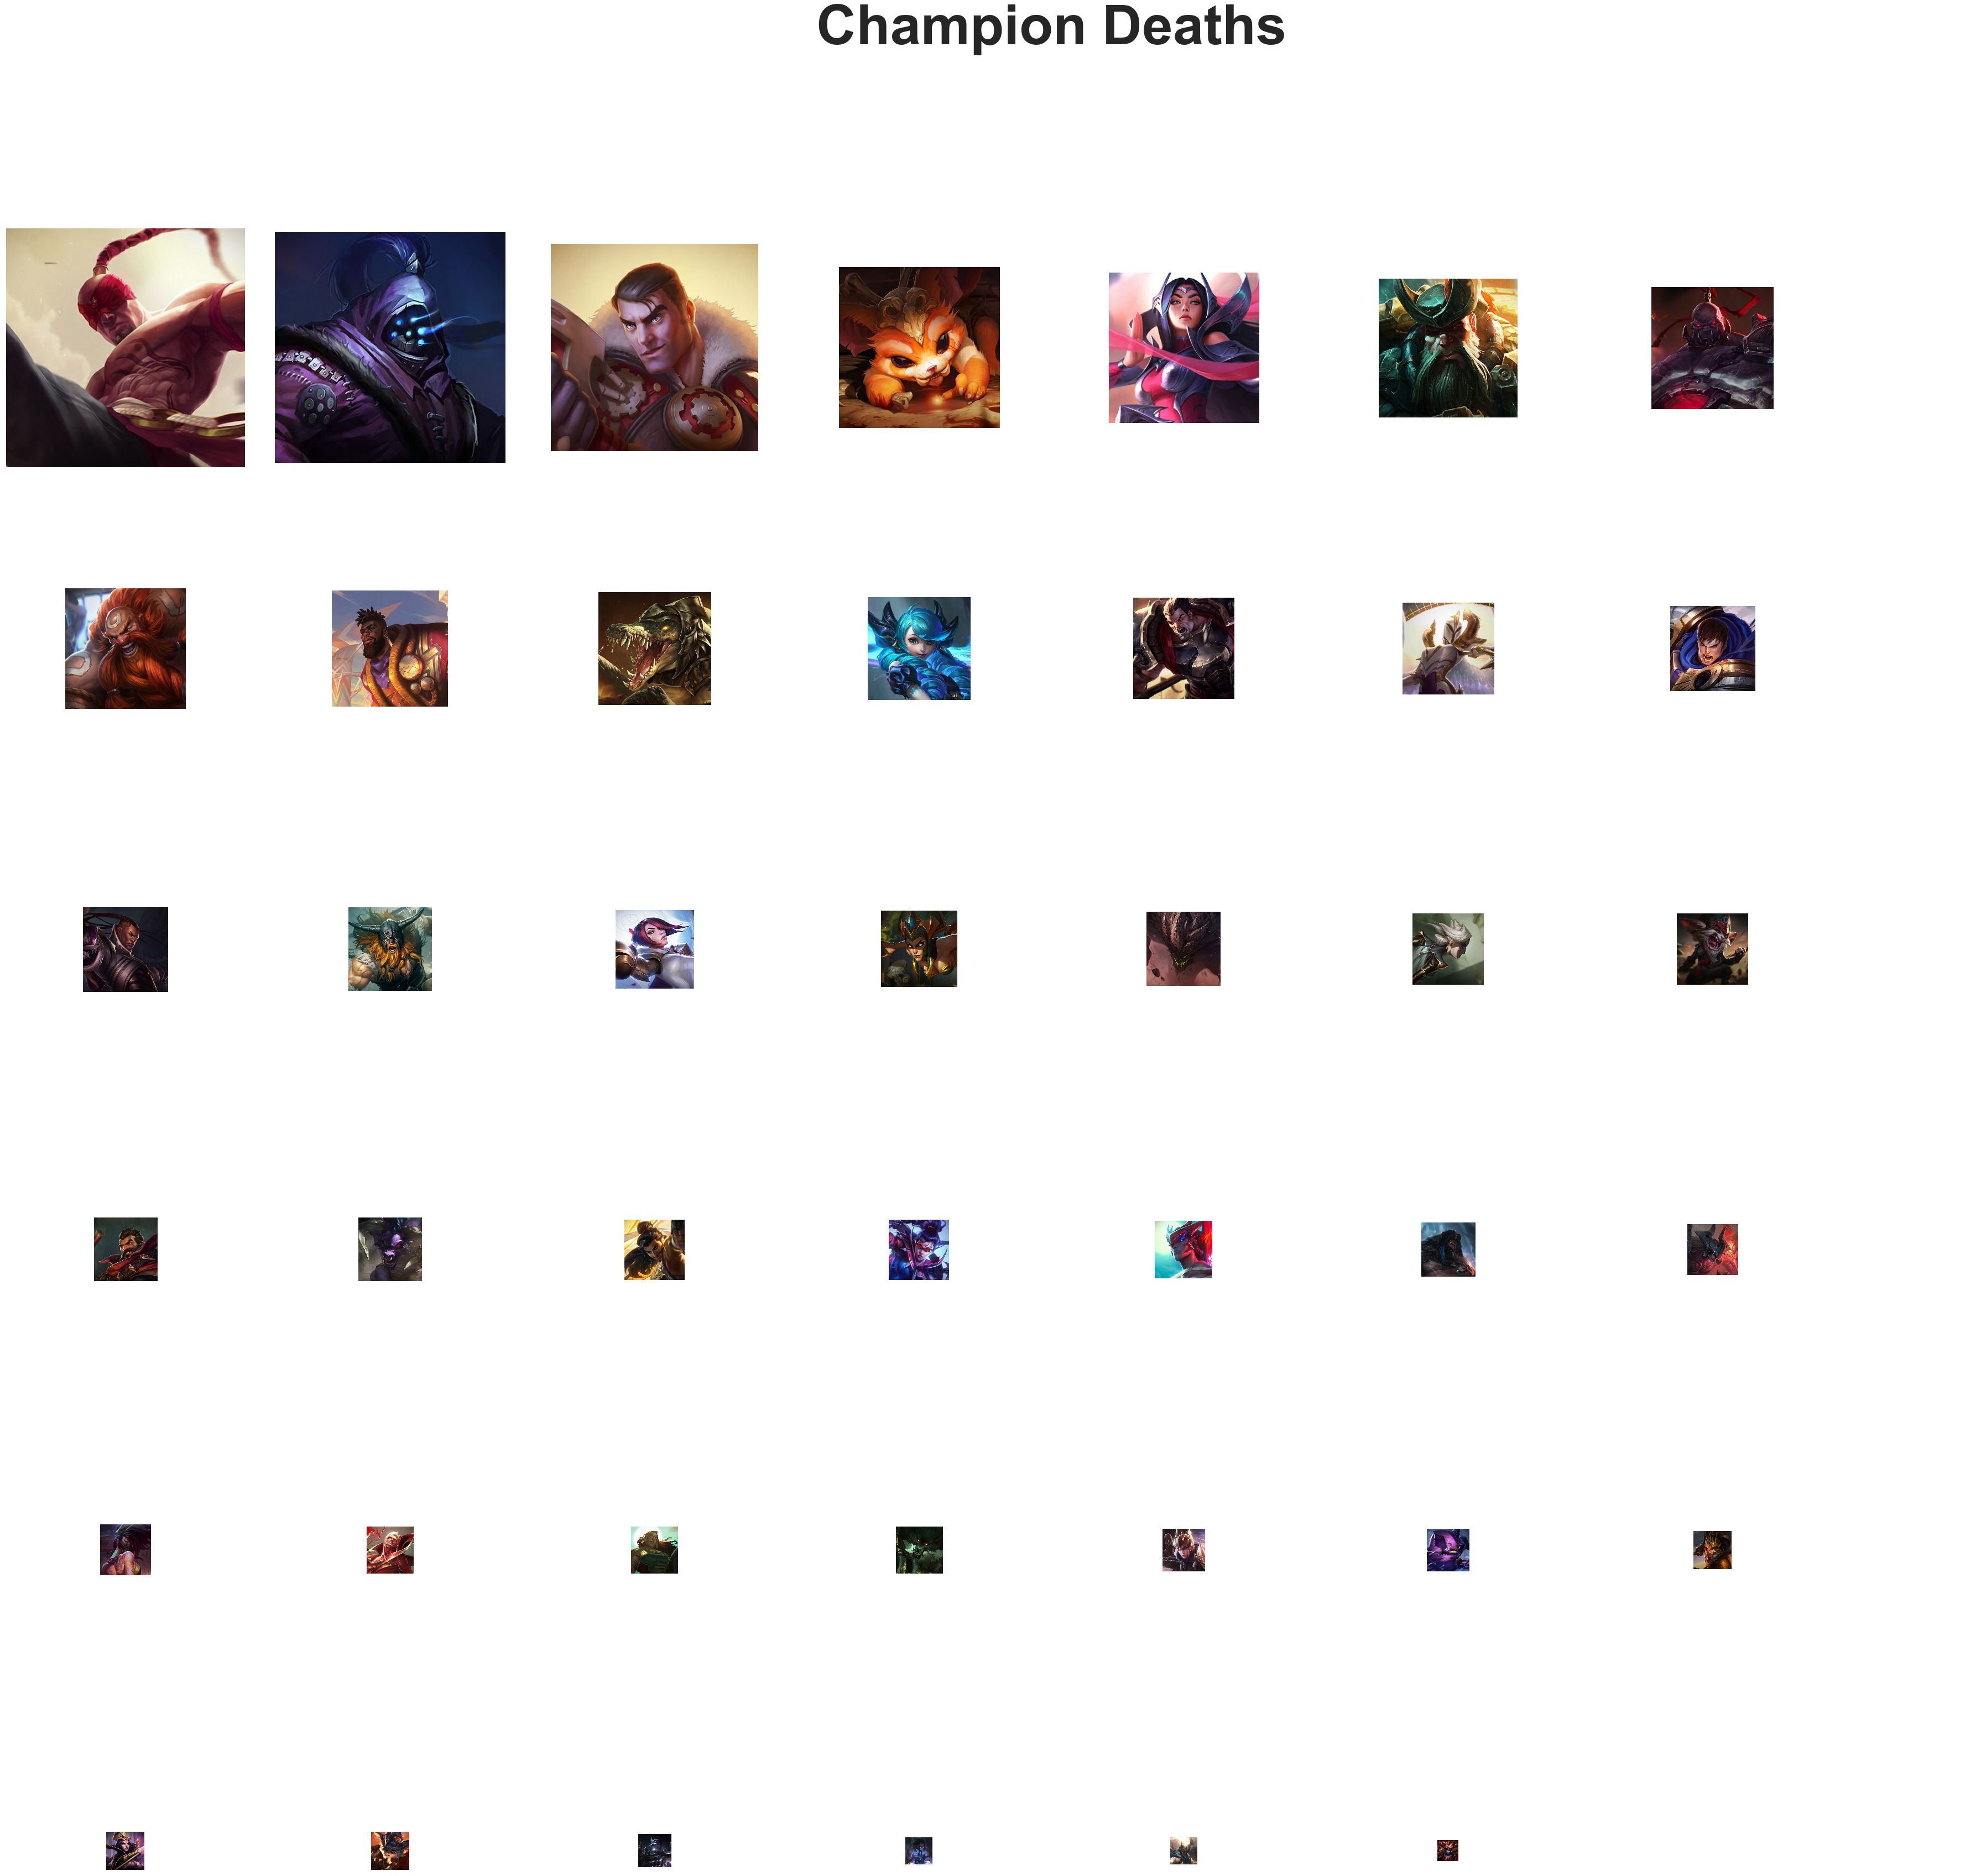

In [183]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import offsetbox


# Calculate the total number of deaths
total_deaths = sum(championsDeaths["deaths"])

# Calculate the percentage of deaths for each champion
death_percentages = [np.sqrt(death / total_deaths) for death in championsDeaths["deaths"]]

# Scaling factor for image size
scaling_factor = 3  # Adjust the scaling factor as desired

# Minimum size for the images
min_image_size = 0.1  # Adjust the minimum size as desire

# Adjust the image sizes by multiplying with the scaling factor
death_percentages = [max(size * scaling_factor, min_image_size) for size in death_percentages]

# Sort the images and sizes together based on size (decreasing order)
sorted_images_sizes = sorted(zip(championsDeaths["images"], death_percentages), key=lambda x: x[1], reverse=True)
sorted_champion_images, sorted_image_sizes = zip(*sorted_images_sizes)


# Calculate the number of rows and columns in the grid layout
num_champions = len(championsDeaths["champion"])
num_rows = int(np.sqrt(num_champions))
num_columns = int(np.ceil(num_champions / num_rows))

# Set the figure size based on the number of champions
fig, ax = plt.subplots(figsize=(60, 60))

# Keep track of the occupied positions in the grid
occupied_positions = np.zeros((num_rows, num_columns), dtype=bool)

# Iterate through each champion and create a square
for i, (champion_image, square_area) in enumerate(zip(championsDeaths["images"], death_percentages)):
    image = plt.imread(champion_image)
    # Find the position with the minimum occupancy
    min_occ_row, min_occ_col = np.unravel_index(np.argmin(occupied_positions), occupied_positions.shape)

    # Set the position as occupied
    occupied_positions[min_occ_row, min_occ_col] = True

    x = min_occ_col
    y = num_rows - min_occ_row - 1
    imagebox = offsetbox.OffsetImage(image, zoom=square_area)
    ab = offsetbox.AnnotationBbox(imagebox, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)

# Set x-axis and y-axis limits
ax.set_xlim(0, num_columns)
ax.set_ylim(0, num_rows)

# Hide the axis labels and ticks
ax.axis('off')

# Set plot title
plt.title('Champion Deaths', fontsize=100, fontweight= "bold")

# Display the plot
plt.show()

Number of deaths per champions in each cluster:

In [184]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 41 champions when they won on the red side

Cluster 0 - died with 41 champions:
 ['Aatrox' 'Akali' 'Akshan' 'Alistar' 'Camille' 'Cassiopeia' 'Darius'
 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Gragas' 'Graves' 'Gwen' 'Illaoi'
 'Irelia' 'JarvanIV' 'Jax' 'Jayce' 'KSante' 'Kayle' 'Kennen' 'Kled'
 'Leblanc' 'LeeSin' 'Lucian' 'Malphite' 'Olaf' 'Pantheon' 'Quinn'
 'Renekton' 'Rumble' 'Shen' 'Shyvana' 'Sion' 'Sylas' 'Udyr' 'Vayne'
 'Vladimir' 'Warwick' 'Yone']
LeeSin        99
Jax           82
Jayce         79
Gnar          38
Irelia        33
Gangplank     33
Gragas        31
Sion          27
KSante        24
Darius        20
Gwen          16
Lucian        15
Renekton      15
Cassiopeia    12
Fiora         11
Kayle         10
Garen         10
Olaf          10
Malphite       9
Camille        8
Akshan         7
Kled           7
Graves         6
Vayne          6
Aatrox         5
Kennen         4
Alistar        4
Warwick        3
Illaoi         3
Yone           3
Udyr      

---
### Clustering Red Team Defeat

In [185]:
redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region  champion  timestamp  \
78      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  12.202533   
92      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  18.802083   
95      EUW1_6272332377  Red   anonymous 2   euw1  Tristana  20.203050   
102     EUW1_6272332377  Red   anonymous 2   euw1  Tristana  23.640633   
107     EUW1_6272332377  Red   anonymous 2   euw1  Tristana  25.149617   
...                 ...  ...           ...    ...       ...        ...   
273092    KR_6376092941  Red  anonymous 19     kr     Jayce  11.808167   
273095    KR_6376092941  Red  anonymous 19     kr     Jayce  12.824417   
273098    KR_6376092941  Red  anonymous 19     kr     Jayce  14.028017   
273101    KR_6376092941  Red  anonymous 19     kr     Jayce  15.607133   
273104    KR_6376092941  Red  anonymous 19     kr     Jayce  16.981567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
78            1254.0       12224.0    NaN            NaN  ...   
92           10015.0        2461.0    NaN            NaN  ...   
95           13421.0        3623.0    NaN            NaN  ...   
102           9809.0        6153.0    NaN            NaN  ...   
107           7536.0        7962.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273092        3496.0       13759.0    NaN            NaN  ...   
273095        5154.0       13610.0    NaN            NaN  ...   
273098        7078.0       13665.0    NaN            NaN  ...   
273101        4627.0       12392.0    NaN            NaN  ...   
273104        4388.0       14002.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
78                            NaN              NaN    False      Death   
92                            NaN              NaN    False      Death   
95                            NaN              NaN    False      Death   
102                           NaN              NaN    False      Death   
107                           NaN              NaN    False      Death   
...                           ...              ...      ...        ...   
273092                        NaN              NaN    False      Death   
273095                        NaN              NaN    False      Death   
273098                        NaN              NaN    False      Death   
273101                        NaN              NaN    False      Death   
273104                        NaN              NaN    False      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
78            NaN           NaN   NaN      NaN       NaN   TOP  
92            NaN           NaN   NaN      NaN       NaN   TOP  
95            NaN           NaN   NaN      NaN       NaN   TOP  
102           NaN           NaN   NaN      NaN       NaN   TOP  
107           NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273092        NaN           NaN   NaN      NaN       NaN   TOP  
273095        NaN           NaN   NaN      NaN       NaN   TOP  
273098        NaN           NaN   NaN      NaN       NaN   TOP  
273101        NaN           NaN   NaN      NaN       NaN   TOP  
273104        NaN           NaN   NaN      NaN       NaN   TOP  

[1329 rows x 55 columns]

In [186]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [187]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

54.8041237113402

In [188]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 lost 11 matches on the red side
anonymous 10 has an average of 5.909090909090909 deaths per game when losing on the red side

anonymous 11 lost 8 matches on the red side
anonymous 11 has an average of 6.625 deaths per game when losing on the red side

anonymous 13 lost 4 matches on the red side
anonymous 13 has an average of 4.25 deaths per game when losing on the red side

anonymous 14 lost 5 matches on the red side
anonymous 14 has an average of 4.6 deaths per game when losing on the red side

anonymous 15 lost 20 matches on the red side
anonymous 15 has an average of 5.2 deaths per game when losing on the red side

anonymous 16 lost 20 matches on the red side
anonymous 16 has an average of 7.5 deaths per game when losing on the red side

anonymous 17 lost 10 matches on the red side
anonymous 17 has an average of 7.1 deaths per game when losing on the red side

anonymous 18 lost 6 matches on the red side
anonymous 18 has an average of 6.666666666666667 deaths per game wh

In [189]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 193 matches in which the jungler died at least once
17 players died a total of 1329 times on the red side
Defeat games on red side contains an average of 6.8860103626943 deaths per game


In [190]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
78            1254.0       12224.0  12.202533
92           10015.0        2461.0  18.802083
95           13421.0        3623.0  20.203050
102           9809.0        6153.0  23.640633
107           7536.0        7962.0  25.149617
...              ...           ...        ...
273092        3496.0       13759.0  11.808167
273095        5154.0       13610.0  12.824417
273098        7078.0       13665.0  14.028017
273101        4627.0       12392.0  15.607133
273104        4388.0       14002.0  16.981567

[1329 rows x 3 columns]

Time discretization

In [191]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [192]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [193]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [194]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [195]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
78         -1.179213      0.624229         -1
92          1.071289     -2.125523          0
95          1.946213     -1.798245          0
102         1.018372     -1.085670          0
107         0.434490     -0.576165          1
...              ...           ...        ...
273092     -0.603294      1.056562         -1
273095     -0.177391      1.014596         -1
273098      0.316840      1.030087         -1
273101     -0.312766      0.671546          0
273104     -0.374160      1.125003          0

[1329 rows x 3 columns]

In [196]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4853847851473816
Silhouette score for k=3: 0.453016412615395


Silhouette score for k=4: 0.43623258566713685
Silhouette score for k=5: 0.39495284256376356
Silhouette score for k=6: 0.3505520726676937
Silhouette score for k=7: 0.3566597360825373
Silhouette score for k=8: 0.35807576513693834
Silhouette score for k=9: 0.37278687702609387
Silhouette score for k=10: 0.3715481723177825
Silhouette score for k=11: 0.38051496744588814
Silhouette score for k=12: 0.38215157271216615
Silhouette score for k=13: 0.38591022296700195
Silhouette score for k=14: 0.3869392936693099
Silhouette score for k=15: 0.3931599486978897
Silhouette score for k=16: 0.39617153300098495
Silhouette score for k=17: 0.40210830798904
Silhouette score for k=18: 0.4028463133812174
Silhouette score for k=19: 0.4087657542430501
Silhouette score for k=20: 0.40727651613215843
Silhouette score for k=25: 0.42808851139481724


k = 4

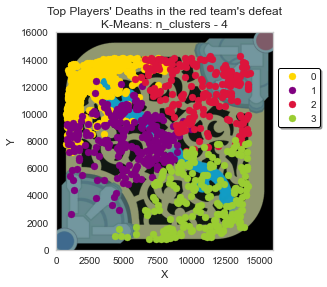

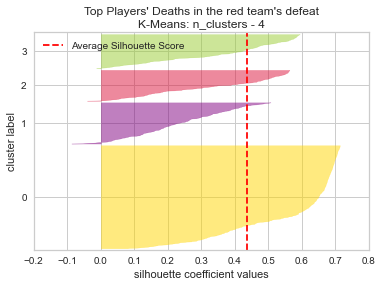

Silhouette score: 0.43623258566713685
0    654
1    262
3    217
2    196
Name: cluster, dtype: int64

Inertia: 899.1341624679744

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2998.342508  12339.094801  -0.862385
1        1   5264.671756   8123.049618   0.099237
2        2  10689.704082  11535.209184   0.464286
3        3  10746.497696   3876.921659   0.046083

In [197]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "crimson", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

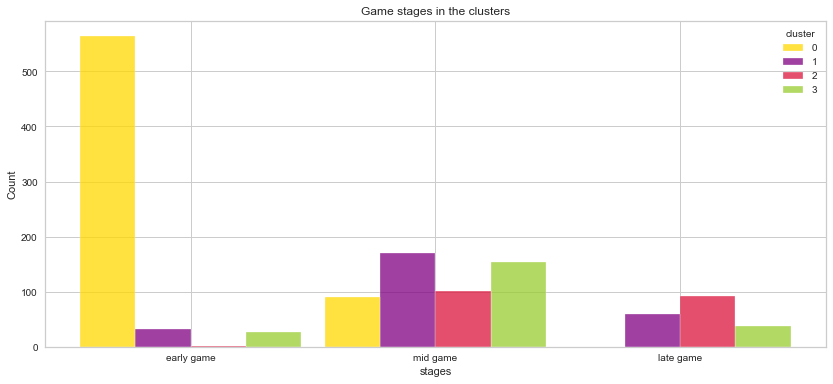

In [198]:
stagesPerClusterV2(redSideDefeat_df, colors)

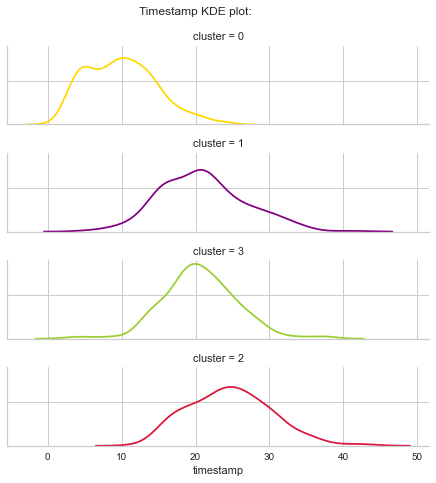

In [199]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

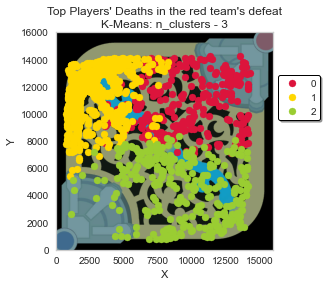

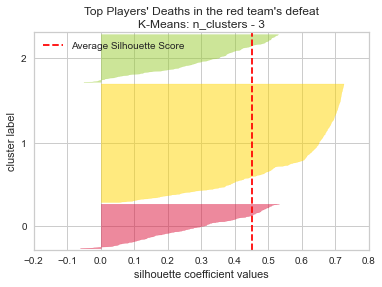

Silhouette score: 0.453016412615395
1    747
2    301
0    281
Name: cluster, dtype: int64

Inertia: 1154.8000986059046

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9652.729537  10821.555160   0.430605
1        1   3035.615797  11898.267738  -0.767068
2        2   9260.498339   4555.936877   0.049834

In [200]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [201]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2747.771894   2029.504949   0.529879
1        1   1520.711483   1788.564043   0.444315
2        2   3055.534682   2159.820132   0.565487

In [202]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14262.0            3622.0           14280.0   
1        1            8279.0             766.0           14096.0   
2        2           14114.0            1088.0            8391.0   

   min coordinate_y  max timestamp  min timestamp  
0            7121.0              1             -1  
1            5407.0              1             -1  
2             761.0              1             -1

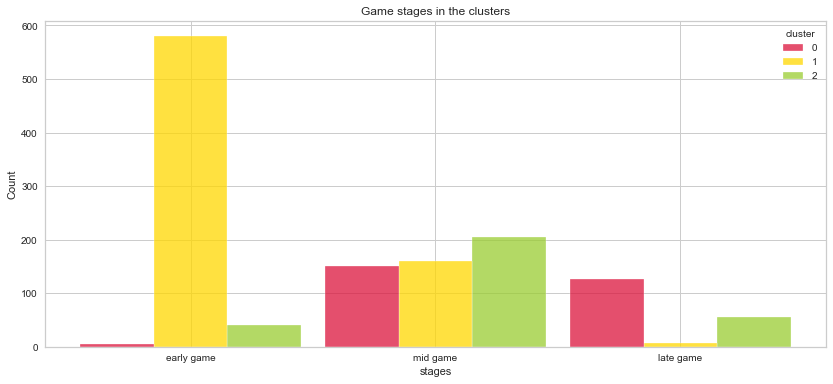

In [203]:
stagesPerClusterV2(redSideDefeat_df, colors)

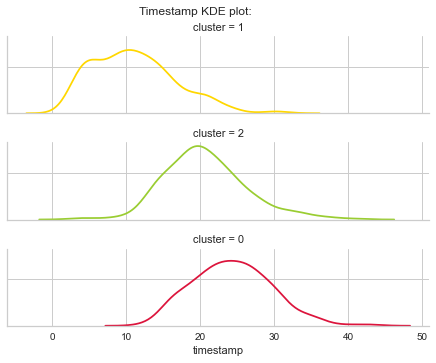

In [204]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [205]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jayce             29
Jax               28
LeeSin            15
Irelia            13
Gragas            10
Renekton          10
Gnar              10
Gangplank          8
Fiora              7
KSante             6
Gwen               5
Darius             5
Sion               4
Yone               4
Camille            3
Kennen             3
Akshan             3
Cassiopeia         3
Olaf               2
Yasuo              2
Quinn              2
Sett               2
Ornn               2
Graves             1
Mordekaiser        1
Poppy              1
Garen              1
Malphite           1
Ryze               1
Tristana           1
Akali              1
Kalista            1
Lucian             1
Warwick            1
Neeko              1
Syndra             1
Vayne              1
Leblanc            1
Nasus              1
Illaoi             1

Deaths with each champion:

In [206]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce          229
Jax            191
Irelia         119
LeeSin          96
Gnar            69
Gangplank       66
Renekton        63
Gragas          48
Fiora           47
Gwen            44
Darius          27
Sion            27
Yone            22
Yasuo           21
Cassiopeia      21
KSante          20
Akshan          20
Camille         18
Olaf            16
Sett            14
Quinn           13
Leblanc         12
Nasus           12
Ornn            12
Syndra           9
Garen            9
Kennen           9
Graves           8
Lucian           7
Mordekaiser      7
Akali            7
Warwick          7
Illaoi           6
Tristana         6
Poppy            6
Vayne            5
Neeko            4
Malphite         4
Kalista          4
Ryze             4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [207]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 40 champions when they won on the red side

Cluster 0 - died with 38 champions:
 ['Akali' 'Akshan' 'Camille' 'Cassiopeia' 'Darius' 'Fiora' 'Gangplank'
 'Garen' 'Gnar' 'Gragas' 'Gwen' 'Illaoi' 'Irelia' 'Jax' 'Jayce' 'KSante'
 'Kalista' 'Kennen' 'Leblanc' 'LeeSin' 'Lucian' 'Malphite' 'Mordekaiser'
 'Nasus' 'Neeko' 'Olaf' 'Ornn' 'Poppy' 'Quinn' 'Renekton' 'Ryze' 'Sett'
 'Sion' 'Syndra' 'Tristana' 'Warwick' 'Yasuo' 'Yone']
Jayce          50
Jax            44
LeeSin         23
Irelia         20
Gangplank      15
Renekton       15
Gnar           11
Gragas          9
Darius          9
Sion            8
Nasus           7
Akshan          6
Fiora           6
Yasuo           5
Gwen            5
Camille         5
Syndra          4
Cassiopeia      4
Malphite        3
Lucian          3
Olaf            3
Poppy           2
Garen           2
Sett            2
Illaoi          2
Yone            2
Tristana        2
Ornn            2
KSante          2
Mordekaiser     2
Leblanc  

---
### Clustering Blue Team Victory

In [208]:
blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
331     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   3.995333   
334     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   4.902650   
341     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   8.101167   
343     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   9.533433   
347     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar  10.869917   
...                 ...   ...           ...    ...      ...        ...   
273328    KR_6375984407  Blue  anonymous 19     kr    Jayce  26.288100   
273333    KR_6375984407  Blue  anonymous 19     kr    Jayce  28.372100   
273337    KR_6375984407  Blue  anonymous 19     kr    Jayce  30.581600   
273348    KR_6375984407  Blue  anonymous 19     kr    Jayce  33.104833   
273350    KR_6375984407  Blue  anonymous 19     kr    Jayce  34.666017   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
331            823.0       10597.0    NaN            NaN  ...   
334           1962.0       11884.0    NaN            NaN  ...   
341           1665.0       11862.0    NaN            NaN  ...   
343           5133.0       13341.0    NaN            NaN  ...   
347           7330.0       12690.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273328       13692.0        7032.0    NaN            NaN  ...   
273333        8775.0       13212.0    NaN            NaN  ...   
273337        1288.0        7966.0    NaN            NaN  ...   
273348        8151.0       13407.0    NaN            NaN  ...   
273350       11289.0        7877.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
331                           NaN              NaN     True      Death   
334                           NaN              NaN     True      Death   
341                           NaN              NaN     True      Death   
343                           NaN              NaN     True      Death   
347                           NaN              NaN     True      Death   
...                           ...              ...      ...        ...   
273328                        NaN              NaN     True      Death   
273333                        NaN              NaN     True      Death   
273337                        NaN              NaN     True      Death   
273348                        NaN              NaN     True      Death   
273350                        NaN              NaN     True      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
331           NaN           NaN   NaN      NaN       NaN   TOP  
334           NaN           NaN   NaN      NaN       NaN   TOP  
341           NaN           NaN   NaN      NaN       NaN   TOP  
343           NaN           NaN   NaN      NaN       NaN   TOP  
347           NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273328        NaN           NaN   NaN      NaN       NaN   TOP  
273333        NaN           NaN   NaN      NaN       NaN   TOP  
273337        NaN           NaN   NaN      NaN       NaN   TOP  
273348        NaN           NaN   NaN      NaN       NaN   TOP  
273350        NaN           NaN   NaN      NaN       NaN   TOP  

[748 rows x 55 columns]

In [209]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [210]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [211]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

44.53551912568306

In [212]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

34.82309124767225

In [213]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 won 7 matches on the blue side
anonymous 10 has an average of 5.285714285714286 deaths per game when winning on the blue side

anonymous 11 won 6 matches on the blue side
anonymous 11 has an average of 4.166666666666667 deaths per game when winning on the blue side

anonymous 13 won 1 matches on the blue side
anonymous 13 has an average of 4.0 deaths per game when winning on the blue side

anonymous 14 won 5 matches on the blue side
anonymous 14 has an average of 4.2 deaths per game when winning on the blue side

anonymous 15 won 14 matches on the blue side
anonymous 15 has an average of 3.0714285714285716 deaths per game when winning on the blue side

anonymous 16 won 12 matches on the blue side
anonymous 16 has an average of 3.9166666666666665 deaths per game when winning on the blue side

anonymous 17 won 13 matches on the blue side
anonymous 17 has an average of 2.923076923076923 deaths per game when winning on the blue side

anonymous 18 won 1 matches on the blue side

In [214]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 163 matches in which the jungler died at least once
17 players died a total of 748 times on the blue side
Victory games on blue side contains an average of 4.588957055214724 deaths per game


In [215]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
331            823.0       10597.0   3.995333
334           1962.0       11884.0   4.902650
341           1665.0       11862.0   8.101167
343           5133.0       13341.0   9.533433
347           7330.0       12690.0  10.869917
...              ...           ...        ...
273328       13692.0        7032.0  26.288100
273333        8775.0       13212.0  28.372100
273337        1288.0        7966.0  30.581600
273348        8151.0       13407.0  33.104833
273350       11289.0        7877.0  34.666017

[748 rows x 3 columns]

Time discretization

In [216]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [217]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [218]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [219]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [220]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
331        -1.278333      0.087925         -1
334        -0.999235      0.495230         -1
341        -1.072012      0.488268         -1
343        -0.222221      0.956337         -1
347         0.316127      0.750311         -1
...              ...           ...        ...
273328      1.875057     -1.040315          1
273333      0.670207      0.915511          1
273337     -1.164391     -0.744726          1
273348      0.517303      0.977224          1
273350      1.286232     -0.772892          1

[748 rows x 3 columns]

In [221]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.47547538243146986


Silhouette score for k=3: 0.44587541656905283
Silhouette score for k=4: 0.42494949722059616
Silhouette score for k=5: 0.3298579485327231
Silhouette score for k=6: 0.3269773214574329
Silhouette score for k=7: 0.34766487724411926
Silhouette score for k=8: 0.3473261667682034
Silhouette score for k=9: 0.363911639350171
Silhouette score for k=10: 0.36763360096674397
Silhouette score for k=11: 0.3537707257557547
Silhouette score for k=12: 0.36164023575126775
Silhouette score for k=13: 0.36396438236782214
Silhouette score for k=14: 0.3664969545792921
Silhouette score for k=15: 0.37053323940023497
Silhouette score for k=16: 0.3798124076922791
Silhouette score for k=17: 0.3784014323378446
Silhouette score for k=18: 0.37200525337559726
Silhouette score for k=19: 0.3766137046541101
Silhouette score for k=20: 0.395846088615911
Silhouette score for k=25: 0.38983882314916973


k = 4

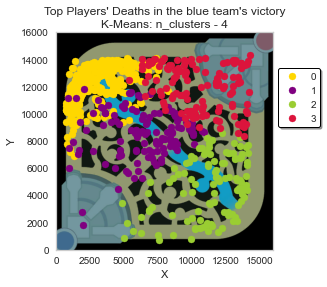

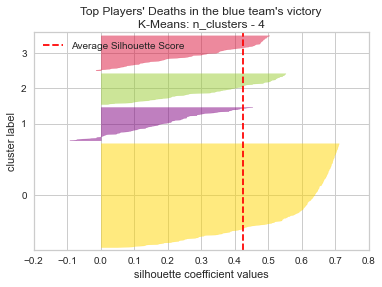

Silhouette score: 0.42494949722059616
0    382
3    129
1    123
2    114
Name: cluster, dtype: int64

Inertia: 548.8682273387975

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2904.528796  12023.722513  -0.884817
1        1   6336.040650   8506.471545   0.040650
2        2  11218.833333   4648.692982   0.061404
3        3  10465.294574  12011.124031   0.310078

In [222]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

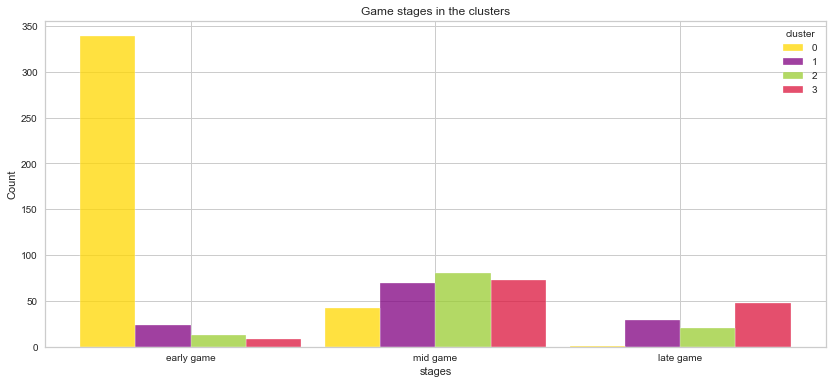

In [223]:
stagesPerClusterV2(blueSideVictory_df, colors)

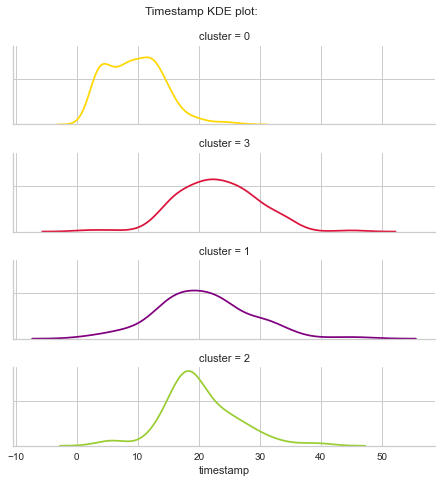

In [224]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

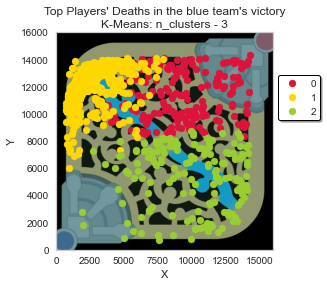

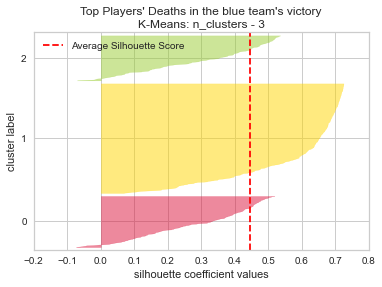

Silhouette score: 0.44587541656905283
1    398
0    186
2    164
Name: cluster, dtype: int64

Inertia: 646.0524448034254

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9390.768817  11385.086022   0.268817
1        1   2869.356784  11860.447236  -0.846734
2        2   9933.817073   5369.878049   0.006098

In [225]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [226]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2711.246719   1784.656620   0.570602
1        1   1638.461350   1490.992544   0.399908
2        2   2969.311282   2231.966722   0.599766

In [227]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14287.0            3082.0           14369.0   
1        1            7858.0             752.0           14120.0   
2        2           14121.0            1950.0            8767.0   

   min coordinate_y  max timestamp  min timestamp  
0            8114.0              1             -1  
1            6022.0              1             -1  
2             753.0              1             -1

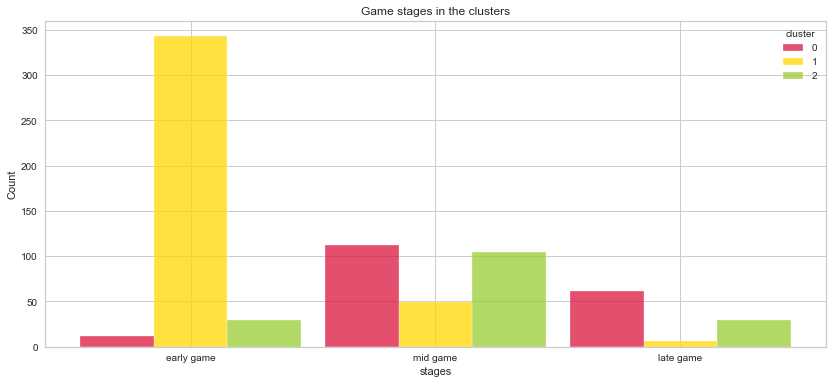

In [228]:
stagesPerClusterV2(blueSideVictory_df, colors)

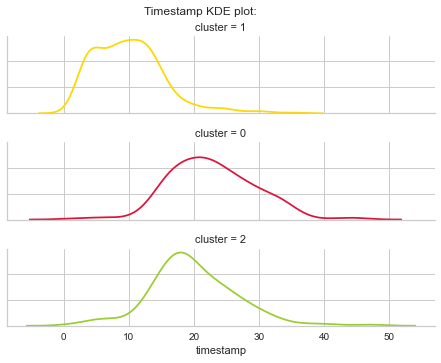

In [229]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [230]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jayce            32
Jax              23
LeeSin           18
Fiora             9
Olaf              7
Gangplank         6
Sion              6
Renekton          6
Gnar              5
Cassiopeia        5
Camille           4
Gragas            4
KSante            4
Lucian            3
Kled              3
JarvanIV          2
Tryndamere        2
Irelia            2
Garen             2
Yone              2
Kalista           2
Sejuani           2
Kayle             1
Ornn              1
Poppy             1
Alistar           1
Graves            1
Nautilus          1
Ryze              1
Vladimir          1
Sett              1
Akali             1
Illaoi            1
Pantheon          1
Gwen              1
Malphite          1

Deaths with each champion:

In [231]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce         175
Jax            95
LeeSin         83
Olaf           43
Fiora          39
Gnar           36
Gangplank      32
Cassiopeia     27
Camille        21
Renekton       17
JarvanIV       16
Sion           14
Sett           12
Tryndamere     11
Lucian         10
Kled           10
KSante          9
Irelia          9
Kalista         8
Yone            8
Malphite        8
Akali           8
Alistar         7
Nautilus        7
Gragas          6
Graves          6
Pantheon        6
Ryze            4
Gwen            4
Garen           4
Sejuani         3
Vladimir        3
Poppy           3
Ornn            2
Illaoi          1
Kayle           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [232]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 36 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Akali' 'Alistar' 'Camille' 'Cassiopeia' 'Fiora' 'Gangplank' 'Gnar'
 'Gragas' 'Graves' 'Gwen' 'Illaoi' 'Irelia' 'JarvanIV' 'Jax' 'Jayce'
 'Kalista' 'Kled' 'LeeSin' 'Malphite' 'Nautilus' 'Olaf' 'Ornn' 'Pantheon'
 'Poppy' 'Renekton' 'Sett' 'Sion' 'Tryndamere']
Jayce         44
Jax           24
Olaf          20
LeeSin        15
Gnar          10
Gangplank     10
Fiora         10
JarvanIV       9
Camille        6
Sion           3
Tryndamere     3
Irelia         3
Cassiopeia     3
Renekton       3
Poppy          2
Gwen           2
Kalista        2
Akali          2
Gragas         2
Malphite       2
Alistar        2
Kled           2
Nautilus       2
Sett           1
Pantheon       1
Illaoi         1
Ornn           1
Graves         1
Name: champion, dtype: int64

Cluster 1 - died with 34 champions:
 ['Akali' 'Alistar' 'Camille' 'Cassiopeia' 'Fiora' 'Gangplank' 'Garen'
 'Gnar' 'Gragas' '

---
### Clustering Blue Team Defeat

In [233]:
blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
17      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan   8.117383   
21      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  10.668300   
39      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  18.028250   
43      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  20.528133   
47      EUW1_6272362521  Blue   anonymous 2   euw1   Akshan  22.148033   
...                 ...   ...           ...    ...      ...        ...   
273534    KR_6376015376  Blue  anonymous 20     kr     Sion  21.960717   
273539    KR_6376015376  Blue  anonymous 20     kr     Sion  24.205267   
273543    KR_6376015376  Blue  anonymous 20     kr     Sion  25.579383   
273547    KR_6376015376  Blue  anonymous 20     kr     Sion  28.063350   
273552    KR_6376015376  Blue  anonymous 20     kr     Sion  29.788467   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17            1056.0       11970.0    NaN            NaN  ...   
21            2696.0       12894.0    NaN            NaN  ...   
39            4790.0       13525.0    NaN            NaN  ...   
43            7771.0        5755.0    NaN            NaN  ...   
47            5003.0        5355.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273534        7793.0        1257.0    NaN            NaN  ...   
273539        1222.0        9164.0    NaN            NaN  ...   
273543        5441.0        3406.0    NaN            NaN  ...   
273547        2928.0        2319.0    NaN            NaN  ...   
273552        7406.0        2504.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
17                            NaN              NaN    False      Death   
21                            NaN              NaN    False      Death   
39                            NaN              NaN    False      Death   
43                            NaN              NaN    False      Death   
47                            NaN              NaN    False      Death   
...                           ...              ...      ...        ...   
273534                        NaN              NaN    False      Death   
273539                        NaN              NaN    False      Death   
273543                        NaN              NaN    False      Death   
273547                        NaN              NaN    False      Death   
273552                        NaN              NaN    False      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
17            NaN           NaN   NaN      NaN       NaN   TOP  
21            NaN           NaN   NaN      NaN       NaN   TOP  
39            NaN           NaN   NaN      NaN       NaN   TOP  
43            NaN           NaN   NaN      NaN       NaN   TOP  
47            NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273534        NaN           NaN   NaN      NaN       NaN   TOP  
273539        NaN           NaN   NaN      NaN       NaN   TOP  
273543        NaN           NaN   NaN      NaN       NaN   TOP  
273547        NaN           NaN   NaN      NaN       NaN   TOP  
273552        NaN           NaN   NaN      NaN       NaN   TOP  

[1400 rows x 55 columns]

In [234]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [235]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

65.17690875232775

In [236]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 10 lost 7 matches on the blue side
anonymous 10 has an average of 5.285714285714286 deaths per game when losing on the blue side

anonymous 11 lost 10 matches on the blue side
anonymous 11 has an average of 6.2 deaths per game when losing on the blue side

anonymous 13 lost 6 matches on the blue side
anonymous 13 has an average of 5.833333333333333 deaths per game when losing on the blue side

anonymous 14 lost 4 matches on the blue side
anonymous 14 has an average of 4.0 deaths per game when losing on the blue side

anonymous 15 lost 19 matches on the blue side
anonymous 15 has an average of 5.0 deaths per game when losing on the blue side

anonymous 16 lost 18 matches on the blue side
anonymous 16 has an average of 7.111111111111111 deaths per game when losing on the blue side

anonymous 17 lost 12 matches on the blue side
anonymous 17 has an average of 8.333333333333334 deaths per game when losing on the blue side

anonymous 18 lost 3 matches on the blue side
anonymous 18 

In [237]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 203 matches in which the jungler died at least once
17 players died a total of 1400 times on the blue side
Defeat games on blue side contains an average of 6.896551724137931 deaths per game


In [238]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
17            1056.0       11970.0   8.117383
21            2696.0       12894.0  10.668300
39            4790.0       13525.0  18.028250
43            7771.0        5755.0  20.528133
47            5003.0        5355.0  22.148033
...              ...           ...        ...
273534        7793.0        1257.0  21.960717
273539        1222.0        9164.0  24.205267
273543        5441.0        3406.0  25.579383
273547        2928.0        2319.0  28.063350
273552        7406.0        2504.0  29.788467

[1400 rows x 3 columns]

Time discretization

In [239]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [240]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [241]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [242]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [243]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
17         -1.116004      0.762625         -1
21         -0.628465      0.996160         -1
39         -0.005962      1.155642          0
43          0.880228     -0.808182          0
47          0.057358     -0.909280          0
...              ...           ...        ...
273534      0.886768     -1.945027          0
273539     -1.066655      0.053424          0
273543      0.187567     -1.401879          1
273547     -0.559496     -1.676612          1
273552      0.771721     -1.629855          1

[1400 rows x 3 columns]

In [244]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4792408522527298
Silhouette score for k=3: 0.44052230324357733
Silhouette score for k=4: 0.4331500181168602
Silhouette score for k=5: 0.3916331408262186
Silhouette score for k=6: 0.3484792407957185
Silhouette score for k=7: 0.35467474750158035
Silhouette score for k=8: 0.35224748217448376
Silhouette score for k=9: 0.3656441438493993
Silhouette score for k=10: 0.36538530484540066
Silhouette score for k=11: 0.36838753725965206
Silhouette score for k=12: 0.36750658672568276
Silhouette score for k=13: 0.35711238201458373
Silhouette score for k=14: 0.3972711204192545
Silhouette score for k=15: 0.3676126132151514
Silhouette score for k=16: 0.38024954189581583
Silhouette score for k=17: 0.37889068663308534
Silhouette score for k=18: 0.3684428348183424
Silhouette score for k=19: 0.3915616715959803
Silhouette score for k=20: 0.370106793027588
Silhouette score for k=25: 0.3969781814423433


k = 4

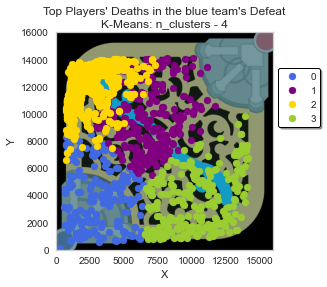

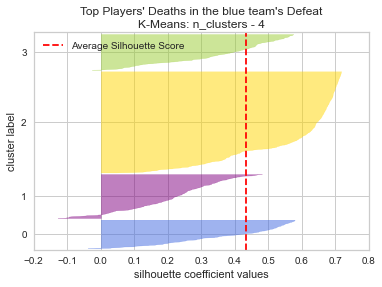

Silhouette score: 0.4331500181168602
2    675
1    294
3    239
0    192
Name: cluster, dtype: int64

Inertia: 969.3094718025877

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3058.052083   4136.057292   0.442708
1        1   6715.493197   9582.928571   0.064626
2        2   2569.459259  11909.090370  -0.868148
3        3  10201.640167   3696.807531   0.050209

In [245]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "purple", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"Defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

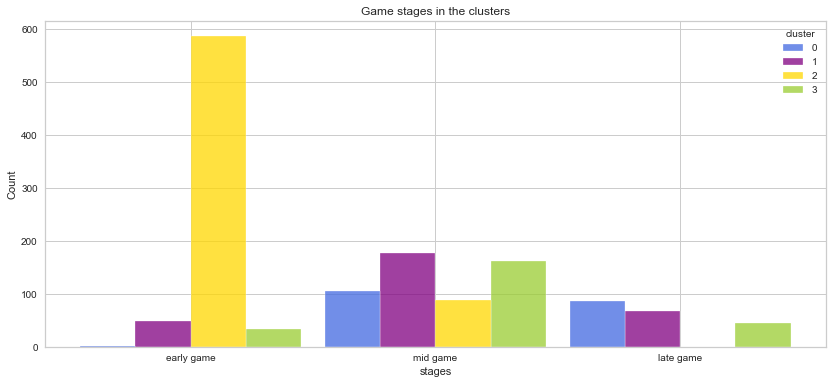

In [246]:
stagesPerClusterV2(blueSideDefeat_df, colors)

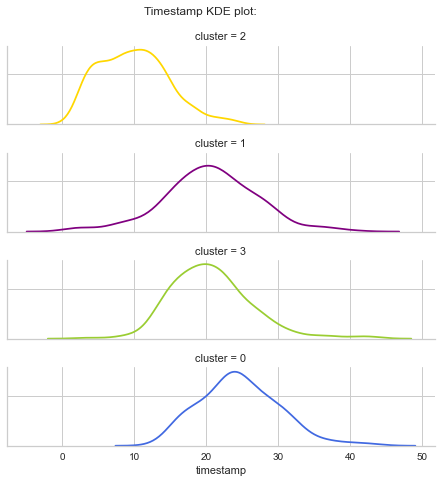

In [247]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

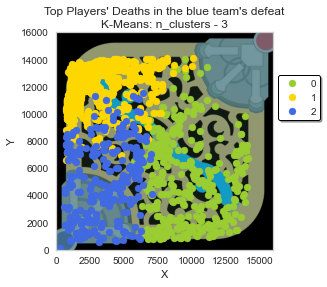

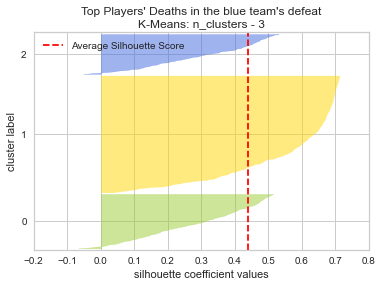

Silhouette score: 0.44052230324357733
1    774
0    361
2    265
Name: cluster, dtype: int64

Inertia: 1257.2535191296843

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9481.559557   5315.390582   0.041551
1        1   3051.391473  11894.304910  -0.772610
2        2   3582.860377   5315.581132   0.426415

In [248]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [249]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2144.461315   3034.061851   0.600961
1        1   1842.580993   1415.935226   0.451783
2        2   1824.925311   2789.552336   0.509588

In [250]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14122.0            5772.0           14026.0   
1        1           10090.0             720.0           14107.0   
2        2            7035.0             274.0           11531.0   

   min coordinate_y  max timestamp  min timestamp  
0             758.0              1             -1  
1            6616.0              1             -1  
2             158.0              1             -1

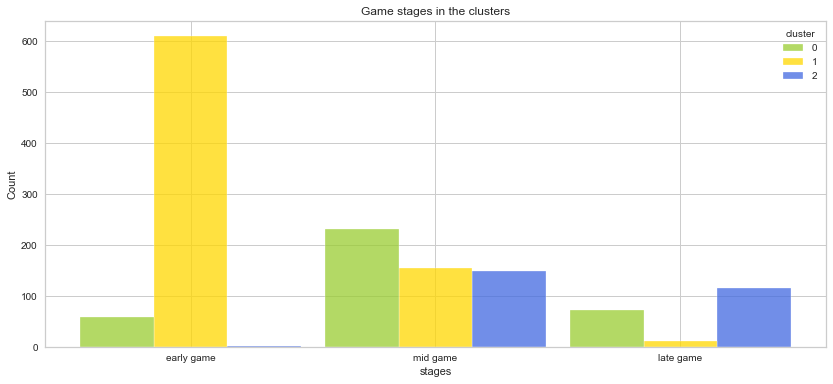

In [251]:
stagesPerClusterV2(blueSideDefeat_df, colors)

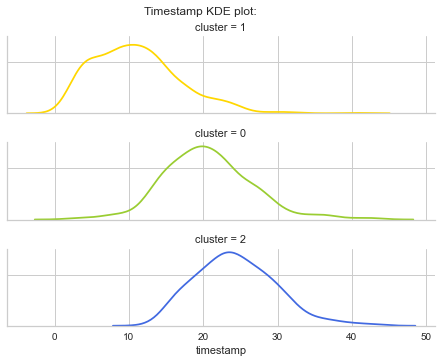

In [252]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [253]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Jax              28
Jayce            25
LeeSin           21
Sion             14
Gragas           11
Gangplank        11
Renekton          9
KSante            9
Fiora             8
Gnar              6
Irelia            4
Camille           4
Quinn             3
Kennen            3
Akshan            3
Garen             3
Gwen              2
Kalista           2
JarvanIV          2
Akali             2
Ryze              2
Vladimir          2
Kled              2
Alistar           2
Rumble            2
Kayle             2
Yone              2
Aatrox            1
Ornn              1
Tristana          1
Lucian            1
Sylas             1
TahmKench         1
Viego             1
Vi                1
Olaf              1
Yasuo             1
Neeko             1
Lillia            1
Yorick            1
Janna             1
Cassiopeia        1
Urgot             1
Shyvana           1
MonkeyKing        1
Chogath           1

Deaths with each champion:

In [254]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce         206
Jax           159
LeeSin        147
Gangplank      92
Sion           81
Gragas         62
Renekton       59
Fiora          55
KSante         54
Gnar           48
Quinn          36
Camille        32
Irelia         27
Kennen         25
Kalista        22
Akshan         21
Akali          15
Urgot          14
Ryze           14
Yone           14
Rumble         13
Ornn           13
Neeko          13
Kayle          13
MonkeyKing     12
Gwen           11
Vladimir       11
Alistar        10
Garen          10
JarvanIV       10
Cassiopeia     10
Yasuo           9
Lillia          9
Viego           9
Aatrox          9
Kled            9
Olaf            8
Vi              8
Yorick          5
Sylas           5
Lucian          5
Tristana        4
Chogath         4
Janna           3
TahmKench       3
Shyvana         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [255]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 46 champions when they won on the red side

Cluster 0 - died with 42 champions:
 ['Aatrox' 'Akali' 'Akshan' 'Alistar' 'Camille' 'Cassiopeia' 'Chogath'
 'Fiora' 'Gangplank' 'Garen' 'Gnar' 'Gragas' 'Gwen' 'Irelia' 'Janna'
 'JarvanIV' 'Jax' 'Jayce' 'KSante' 'Kalista' 'Kayle' 'Kennen' 'LeeSin'
 'Lillia' 'Lucian' 'MonkeyKing' 'Neeko' 'Olaf' 'Ornn' 'Quinn' 'Renekton'
 'Rumble' 'Ryze' 'Sion' 'Sylas' 'TahmKench' 'Urgot' 'Vi' 'Vladimir'
 'Yasuo' 'Yone' 'Yorick']
Jayce         53
LeeSin        44
Jax           36
Gangplank     19
Sion          18
Gnar          16
Renekton      15
Camille       14
Gragas        14
Fiora         13
KSante        12
Quinn         11
Akshan        10
Kennen         8
Akali          7
Kalista        6
Yasuo          5
Rumble         5
Yone           4
Kayle          4
Urgot          4
Gwen           4
JarvanIV       3
Cassiopeia     3
Ornn           3
Alistar        2
Lucian         2
Ryze           2
Vi             2
Irelia         2
Neek

---

### Blue Win Rate vs Red Win Rate

In [256]:
wins_df = top_deaths_df[top_deaths_df["victory"] == True]
wins_df

gameId  team      summoner region champion  timestamp  \
331     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   3.995333   
334     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   4.902650   
341     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   8.101167   
343     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar   9.533433   
347     EUW1_6273568445  Blue   anonymous 3   euw1     Gnar  10.869917   
...                 ...   ...           ...    ...      ...        ...   
273631    KR_6375996445   Red  anonymous 21     kr     Sion  16.009683   
273636    KR_6375996445   Red  anonymous 21     kr     Sion  18.526400   
273645    KR_6375996445   Red  anonymous 21     kr     Sion  21.620800   
273657    KR_6375996445   Red  anonymous 21     kr     Sion  25.485417   
273671    KR_6375996445   Red  anonymous 21     kr     Sion  32.699167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
331            823.0       10597.0    NaN            NaN  ...   
334           1962.0       11884.0    NaN            NaN  ...   
341           1665.0       11862.0    NaN            NaN  ...   
343           5133.0       13341.0    NaN            NaN  ...   
347           7330.0       12690.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
273631        1771.0       11742.0    NaN            NaN  ...   
273636        8611.0        5140.0    NaN            NaN  ...   
273645        5283.0        9605.0    NaN            NaN  ...   
273657        4439.0        5171.0    NaN            NaN  ...   
273671       11064.0       13195.0    NaN            NaN  ...   

        trueDamageDoneToChampions  trueDamageTaken  victory  eventType  \
331                           NaN              NaN     True      Death   
334                           NaN              NaN     True      Death   
341                           NaN              NaN     True      Death   
343                           NaN              NaN     True      Death   
347                           NaN              NaN     True      Death   
...                           ...              ...      ...        ...   
273631                        NaN              NaN     True      Death   
273636                        NaN              NaN     True      Death   
273645                        NaN              NaN     True      Death   
273657                        NaN              NaN     True      Death   
273671                        NaN              NaN     True      Death   

        skillSlot  buildingType  lane  monster  itemName  role  
331           NaN           NaN   NaN      NaN       NaN   TOP  
334           NaN           NaN   NaN      NaN       NaN   TOP  
341           NaN           NaN   NaN      NaN       NaN   TOP  
343           NaN           NaN   NaN      NaN       NaN   TOP  
347           NaN           NaN   NaN      NaN       NaN   TOP  
...           ...           ...   ...      ...       ...   ...  
273631        NaN           NaN   NaN      NaN       NaN   TOP  
273636        NaN           NaN   NaN      NaN       NaN   TOP  
273645        NaN           NaN   NaN      NaN       NaN   TOP  
273657        NaN           NaN   NaN      NaN       NaN   TOP  
273671        NaN           NaN   NaN      NaN       NaN   TOP  

[1844 rows x 55 columns]

In [257]:
wins = len(np.unique(wins_df["gameId"]))
wins

411

In [258]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 60.34063260340633 vs Blue: 39.65936739659367


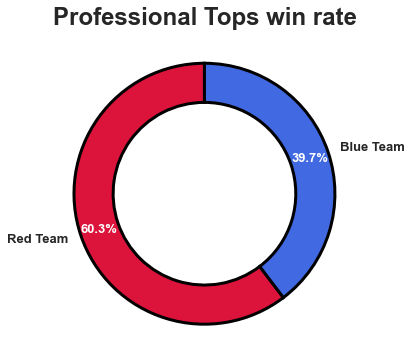

In [259]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Tops win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [260]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 59.436008676789584 vs Blue: 40.563991323210416
